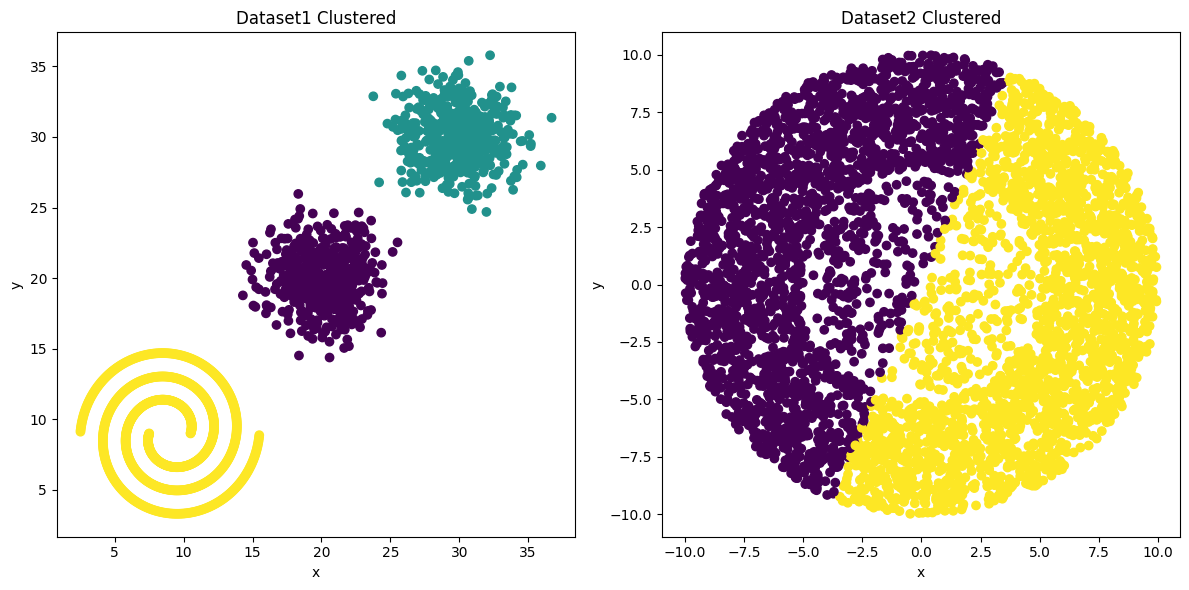

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd


dataset1 = pd.read_csv('./Datasets/Dataset1.txt', delimiter=',')
dataset2 = pd.read_csv('./Datasets/Dataset2.txt', delimiter=',')

data1 = dataset1[['x', 'y']]
data2 = dataset2[['x', 'y']]

kmeans1 = KMeans(n_clusters=3, random_state=42).fit(data1)  # For Dataset1
kmeans2 = KMeans(n_clusters=2, random_state=42).fit(data2)  # For Dataset2

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data1['x'], data1['y'], c=kmeans1.labels_, cmap='viridis')
plt.title('Dataset1 Clustered')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.scatter(data2['x'], data2['y'], c=kmeans2.labels_, cmap='viridis')
plt.title('Dataset2 Clustered')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

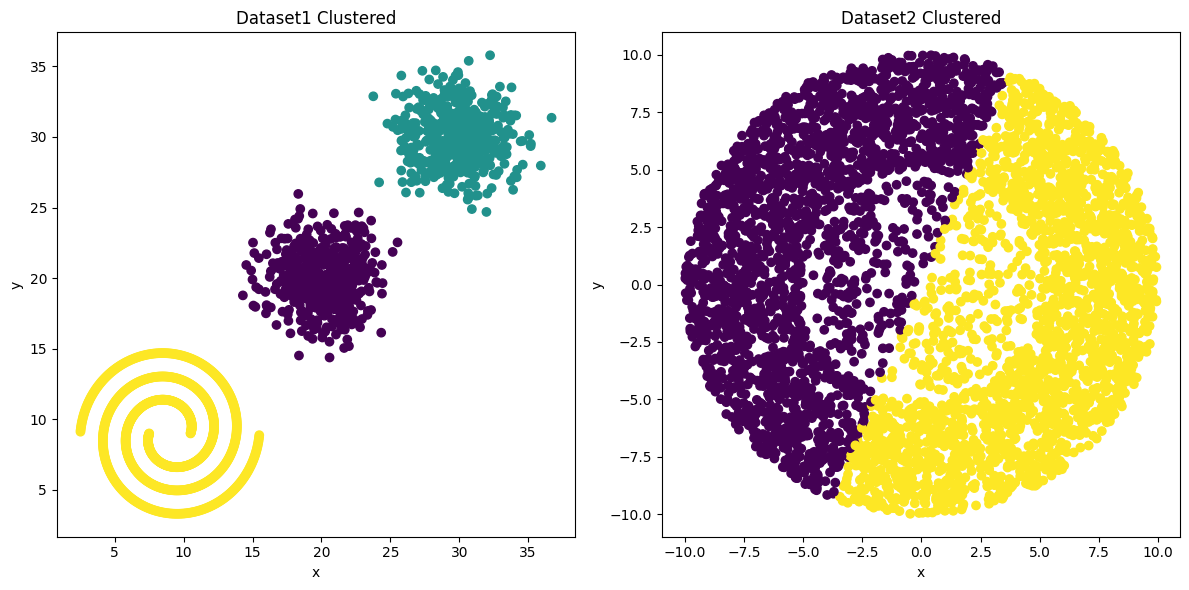

Cluster centers for Dataset1:
 [[20.09935944 19.94999309]
 [29.89850662 30.02981985]
 [ 9.          9.        ]]
Cluster centers for Dataset2:
 [[-4.42351958  1.77627049]
 [ 4.35783133 -1.78980042]]


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

dataset1 = pd.read_csv('./Datasets/Dataset1.txt', delimiter=',')
dataset2 = pd.read_csv('./Datasets/Dataset2.txt', delimiter=',')

data1 = dataset1[['x', 'y']]
data2 = dataset2[['x', 'y']]

kmeans1 = KMeans(n_clusters=3, random_state=42).fit(data1)  # For Dataset1
kmeans2 = KMeans(n_clusters=2, random_state=42).fit(data2)  # For Dataset2

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data1['x'], data1['y'], c=kmeans1.labels_, cmap='viridis')
plt.title('Dataset1 Clustered')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.scatter(data2['x'], data2['y'], c=kmeans2.labels_, cmap='viridis')
plt.title('Dataset2 Clustered')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

print("Cluster centers for Dataset1:\n", kmeans1.cluster_centers_)
print("Cluster centers for Dataset2:\n", kmeans2.cluster_centers_)

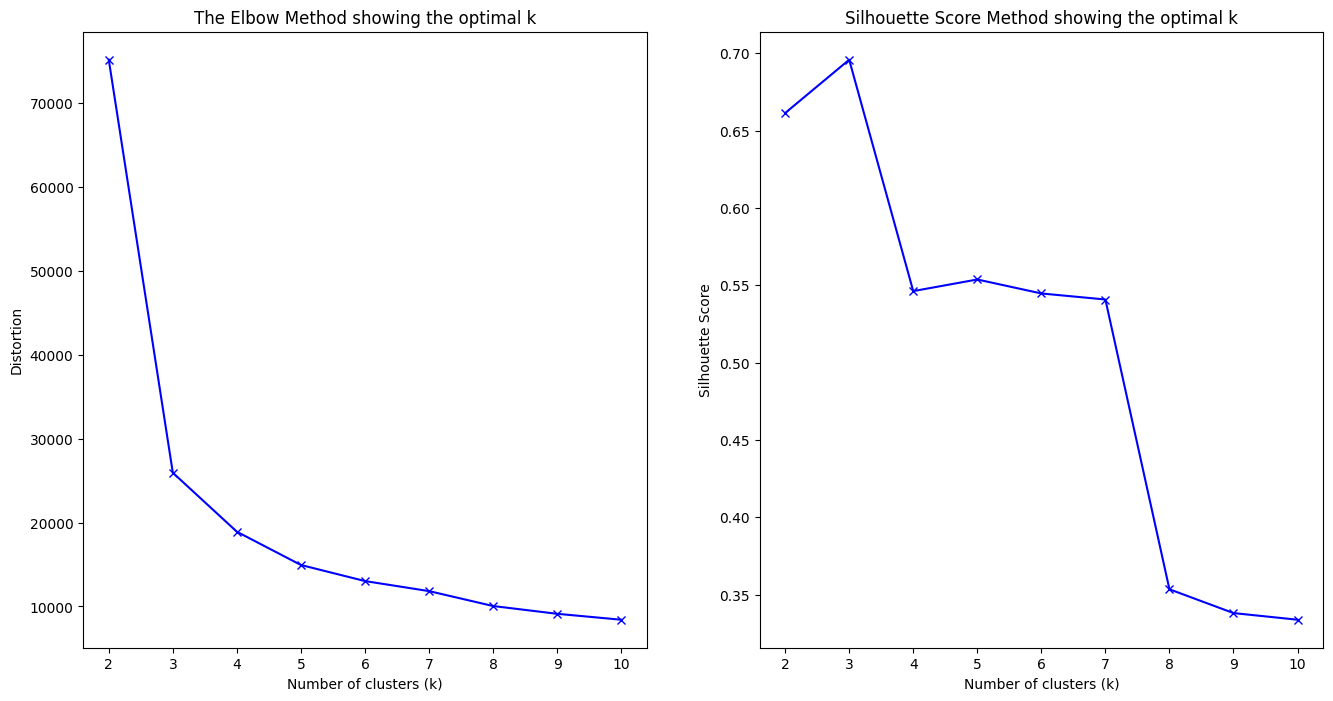

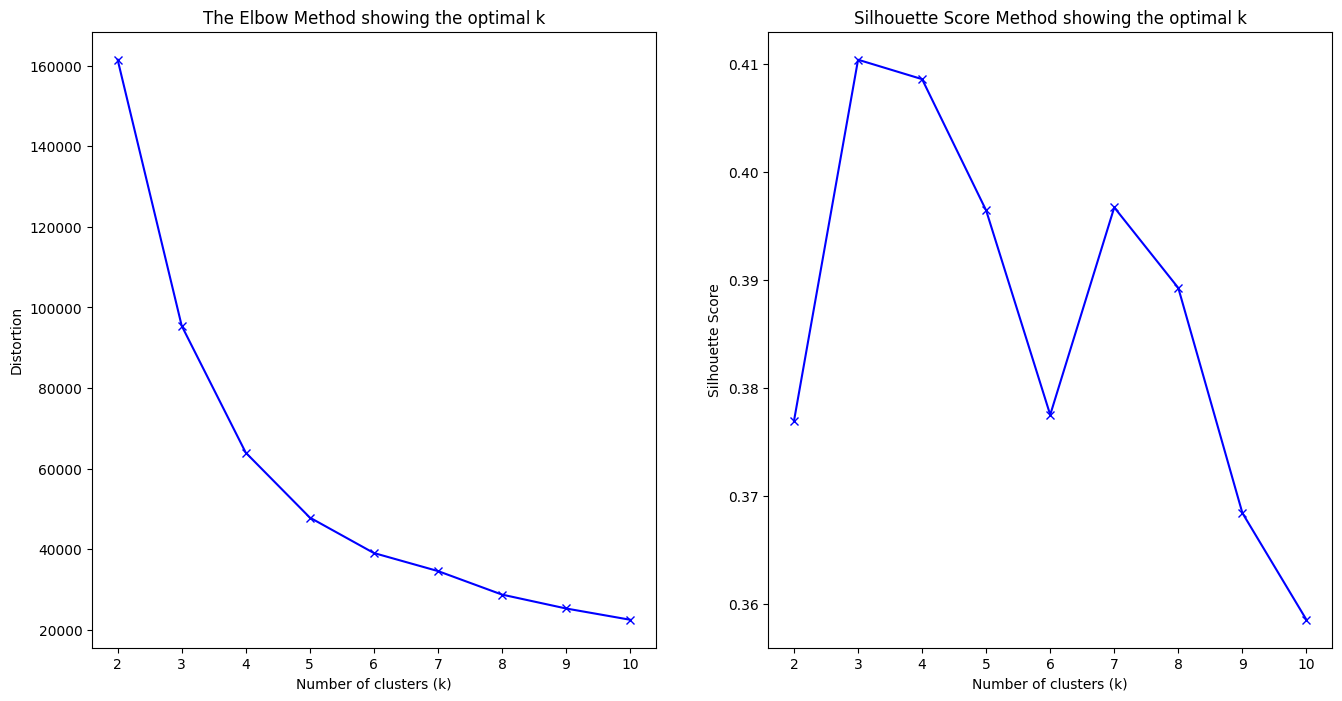

Silhouette Score for Dataset1 with 3 clusters: 0.6958375349228363
Silhouette Score for Dataset2 with 2 clusters: 0.3769508590260366


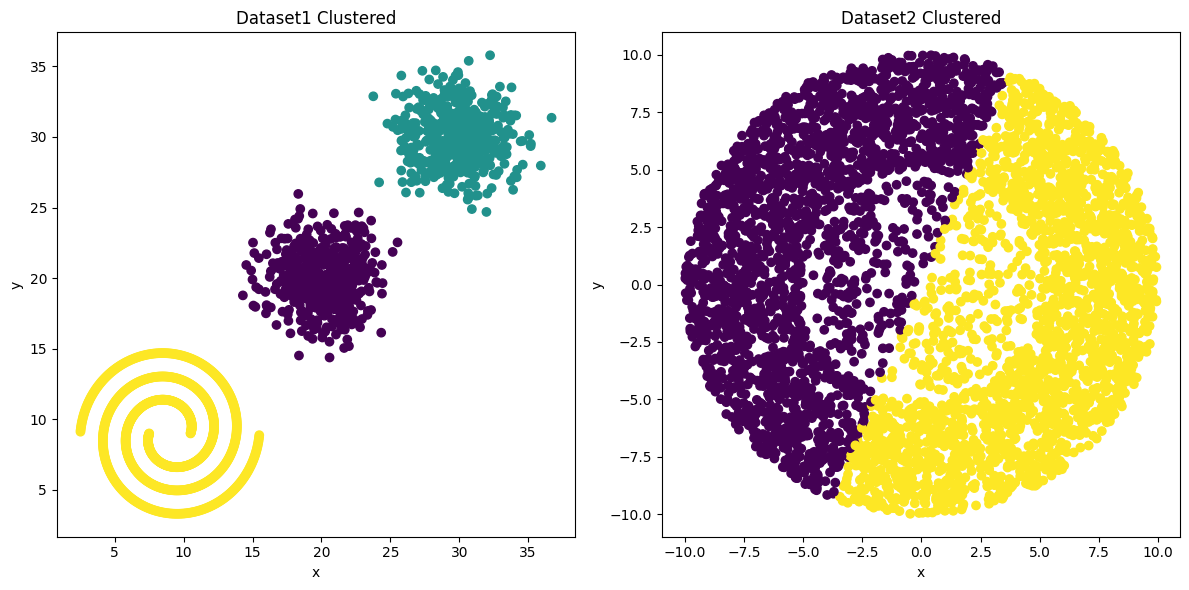

Cluster centers for Dataset1:
 [[20.09935944 19.94999309]
 [29.89850662 30.02981985]
 [ 9.          9.        ]]
Cluster centers for Dataset2:
 [[-4.42351958  1.77627049]
 [ 4.35783133 -1.78980042]]


In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

dataset1 = pd.read_csv('./Datasets/Dataset1.txt', delimiter=',')
dataset2 = pd.read_csv('./Datasets/Dataset2.txt', delimiter=',')

data1 = dataset1[['x', 'y']]
data2 = dataset2[['x', 'y']]

def plot_elbow_method(data, max_k=10):
    distortions = []
    silhouette_scores = []
    K = range(2, max_k+1)
    
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)
        
    plt.figure(figsize=(16, 8))
    
    plt.subplot(1, 2, 1)
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    
    plt.subplot(1, 2, 2)
    plt.plot(K, silhouette_scores, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Method showing the optimal k')
    
    plt.show()

plot_elbow_method(data1, max_k=10)

plot_elbow_method(data2, max_k=10)

kmeans1 = KMeans(n_clusters=3, random_state=42).fit(data1)  # For Dataset1
kmeans2 = KMeans(n_clusters=2, random_state=42).fit(data2)  # For Dataset2

silhouette_score1 = silhouette_score(data1, kmeans1.labels_)
silhouette_score2 = silhouette_score(data2, kmeans2.labels_)

print(f"Silhouette Score for Dataset1 with 3 clusters: {silhouette_score1}")
print(f"Silhouette Score for Dataset2 with 2 clusters: {silhouette_score2}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data1['x'], data1['y'], c=kmeans1.labels_, cmap='viridis')
plt.title('Dataset1 Clustered')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.scatter(data2['x'], data2['y'], c=kmeans2.labels_, cmap='viridis')
plt.title('Dataset2 Clustered')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

print("Cluster centers for Dataset1:\n", kmeans1.cluster_centers_)
print("Cluster centers for Dataset2:\n", kmeans2.cluster_centers_)

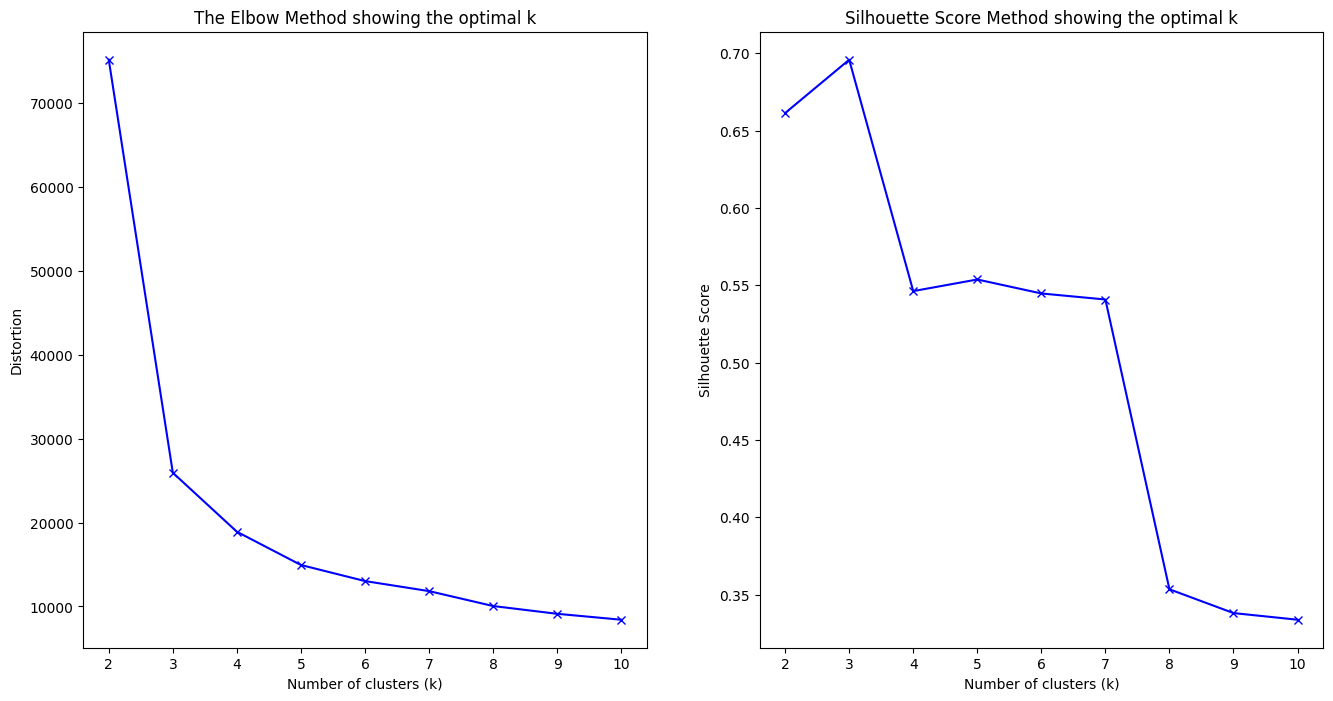

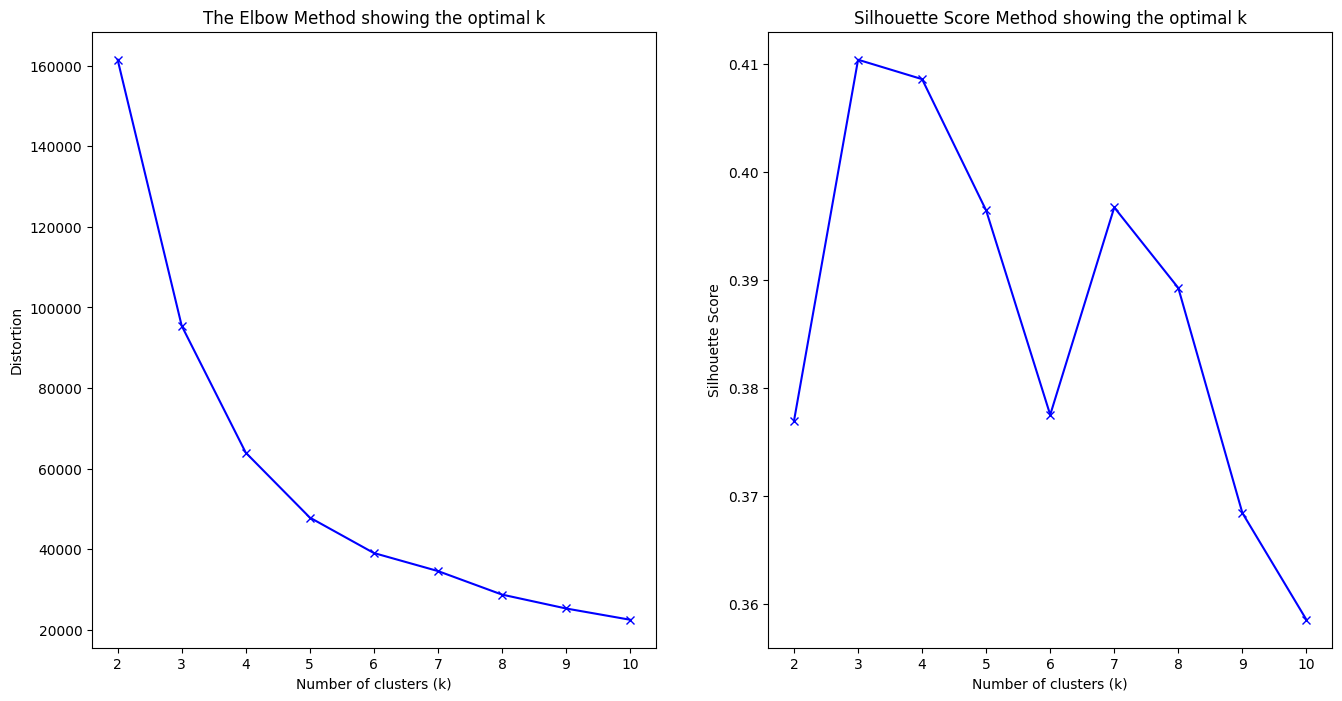

Silhouette Score for Dataset1 with 3 clusters: 0.6958375349228363
Silhouette Score for Dataset2 with 2 clusters: 0.3769508590260366


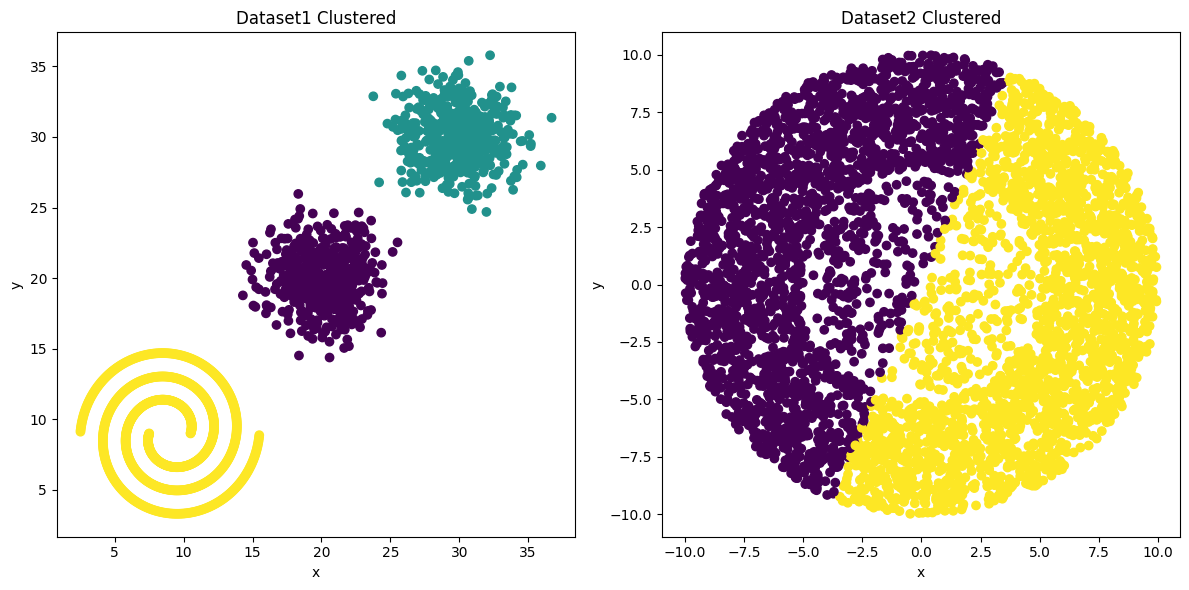

Cluster centers for Dataset1:
 [[20.09935944 19.94999309]
 [29.89850662 30.02981985]
 [ 9.          9.        ]]
Cluster centers for Dataset2:
 [[-4.42351958  1.77627049]
 [ 4.35783133 -1.78980042]]


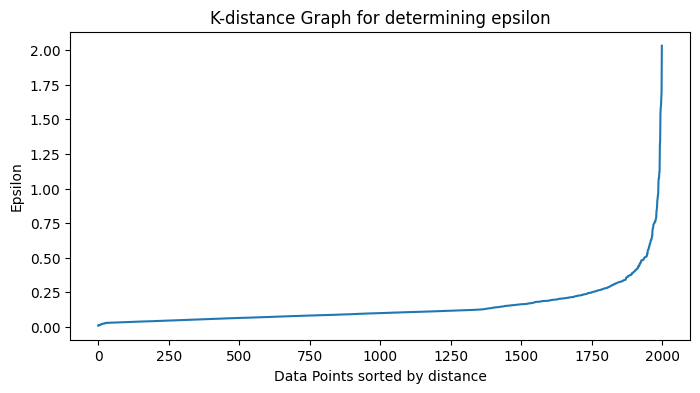

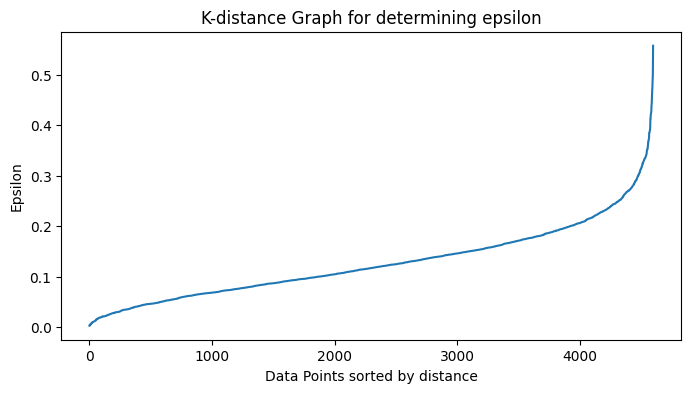

Silhouette Score for Dataset1 with DBSCAN: 0.35296019530275724
Silhouette Score for Dataset2 with DBSCAN: Not applicable (only one cluster found)


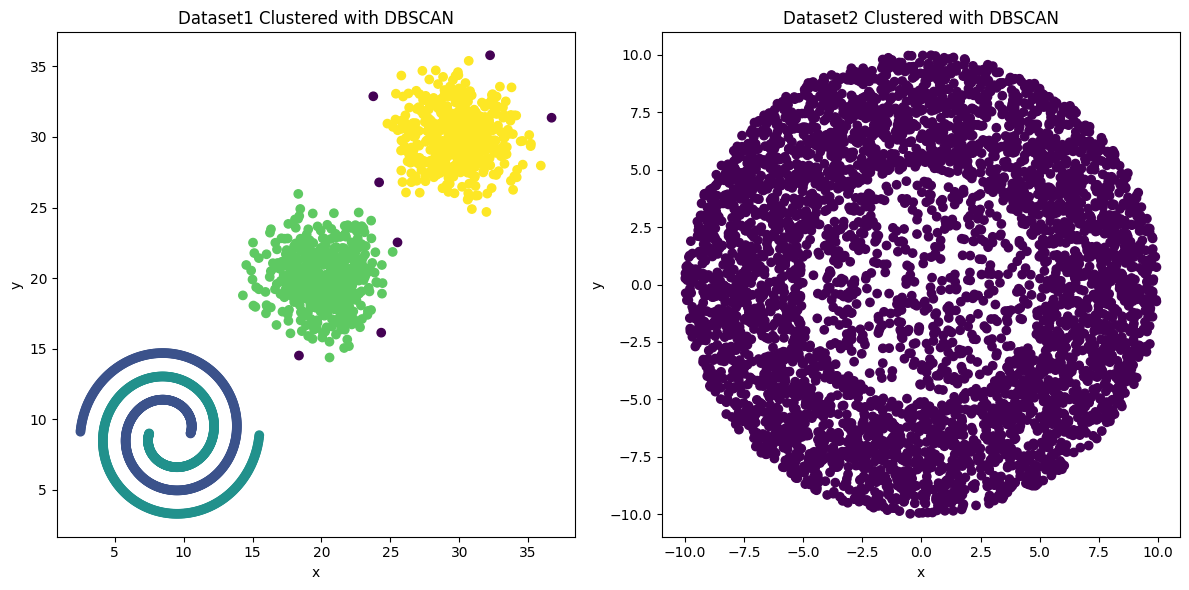

In [7]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors

dataset1 = pd.read_csv('./Datasets/Dataset1.txt', delimiter=',')
dataset2 = pd.read_csv('./Datasets/Dataset2.txt', delimiter=',')

data1 = dataset1[['x', 'y']]
data2 = dataset2[['x', 'y']]

def plot_elbow_method(data, max_k=10):
    distortions = []
    silhouette_scores = []
    K = range(2, max_k+1)
    
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)
        
    plt.figure(figsize=(16, 8))
    
    plt.subplot(1, 2, 1)
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    
    plt.subplot(1, 2, 2)
    plt.plot(K, silhouette_scores, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Method showing the optimal k')
    
    plt.show()

plot_elbow_method(data1, max_k=10)

plot_elbow_method(data2, max_k=10)

kmeans1 = KMeans(n_clusters=3, random_state=42).fit(data1)  # For Dataset1
kmeans2 = KMeans(n_clusters=2, random_state=42).fit(data2)  # For Dataset2

silhouette_score1 = silhouette_score(data1, kmeans1.labels_)
silhouette_score2 = silhouette_score(data2, kmeans2.labels_)

print(f"Silhouette Score for Dataset1 with 3 clusters: {silhouette_score1}")
print(f"Silhouette Score for Dataset2 with 2 clusters: {silhouette_score2}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data1['x'], data1['y'], c=kmeans1.labels_, cmap='viridis')
plt.title('Dataset1 Clustered')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.scatter(data2['x'], data2['y'], c=kmeans2.labels_, cmap='viridis')
plt.title('Dataset2 Clustered')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

print("Cluster centers for Dataset1:\n", kmeans1.cluster_centers_)
print("Cluster centers for Dataset2:\n", kmeans2.cluster_centers_)

def optimal_eps(data):
    neighbors = NearestNeighbors(n_neighbors=5)
    neighbors_fit = neighbors.fit(data)
    distances, indices = neighbors_fit.kneighbors(data)
    distances = np.sort(distances, axis=0)
    distances = distances[:, 1]
    plt.figure(figsize=(8, 4))
    plt.plot(distances)
    plt.xlabel('Data Points sorted by distance')
    plt.ylabel('Epsilon')
    plt.title('K-distance Graph for determining epsilon')
    plt.show()

optimal_eps(data1)

optimal_eps(data2)

dbscan1 = DBSCAN(eps=1.5, min_samples=5).fit(data1)  
dbscan2 = DBSCAN(eps=1.5, min_samples=5).fit(data2)  

if len(set(dbscan1.labels_)) <= 1:
    dbscan1 = DBSCAN(eps=2.0, min_samples=5).fit(data1)
if len(set(dbscan2.labels_)) <= 1:
    dbscan2 = DBSCAN(eps=2.0, min_samples=5).fit(data2)

if len(set(dbscan1.labels_)) > 1:
    silhouette_score_dbscan1 = silhouette_score(data1, dbscan1.labels_)
else:
    silhouette_score_dbscan1 = "Not applicable (only one cluster found)"

if len(set(dbscan2.labels_)) > 1:
    silhouette_score_dbscan2 = silhouette_score(data2, dbscan2.labels_)
else:
    silhouette_score_dbscan2 = "Not applicable (only one cluster found)"

print(f"Silhouette Score for Dataset1 with DBSCAN: {silhouette_score_dbscan1}")
print(f"Silhouette Score for Dataset2 with DBSCAN: {silhouette_score_dbscan2}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data1['x'], data1['y'], c=dbscan1.labels_, cmap='viridis')
plt.title('Dataset1 Clustered with DBSCAN')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.scatter(data2['x'], data2['y'], c=dbscan2.labels_, cmap='viridis')
plt.title('Dataset2 Clustered with DBSCAN')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

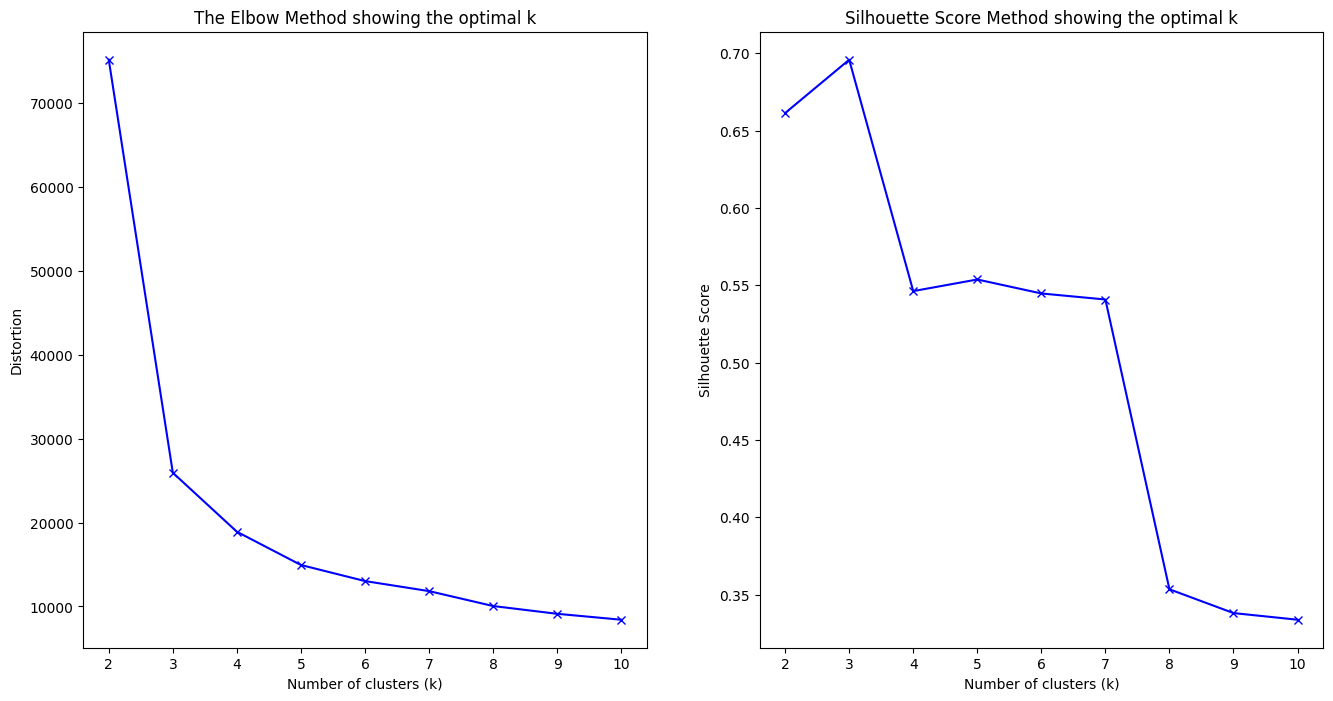

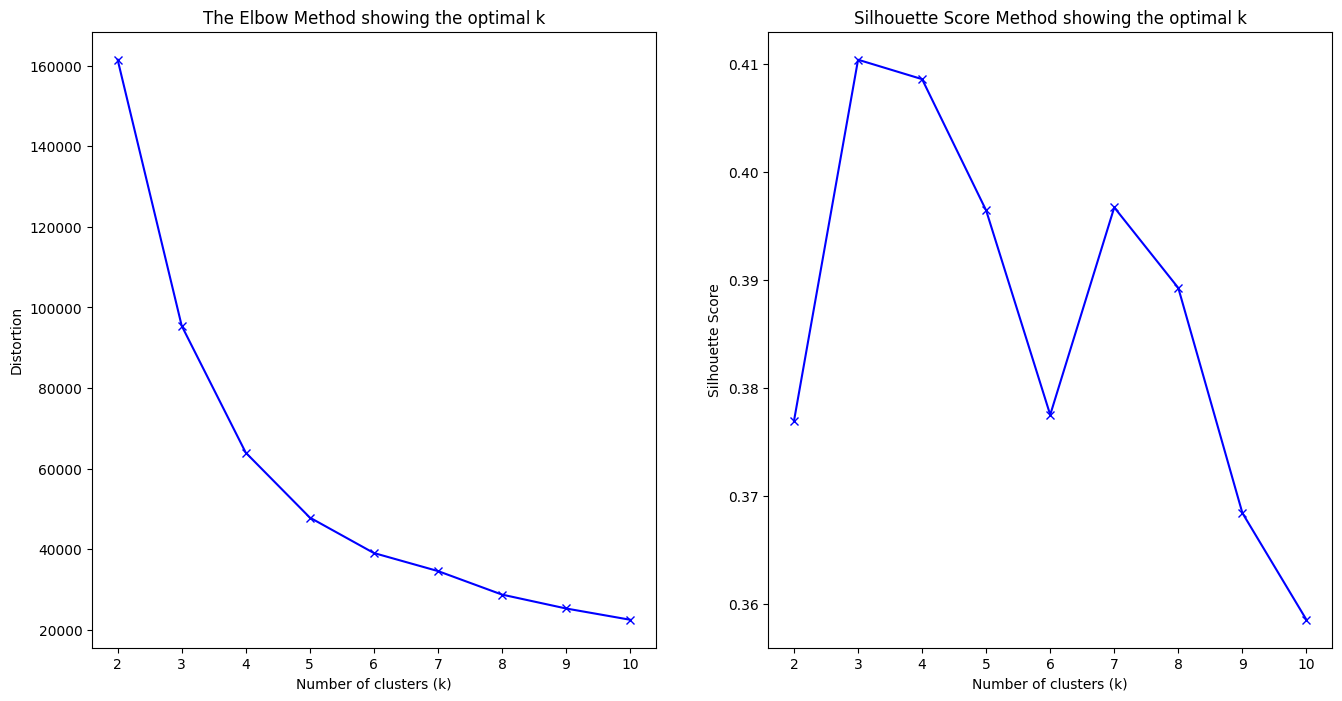

Silhouette Score for Dataset1 with 3 clusters: 0.6958375349228363
Silhouette Score for Dataset2 with 2 clusters: 0.3769508590260366


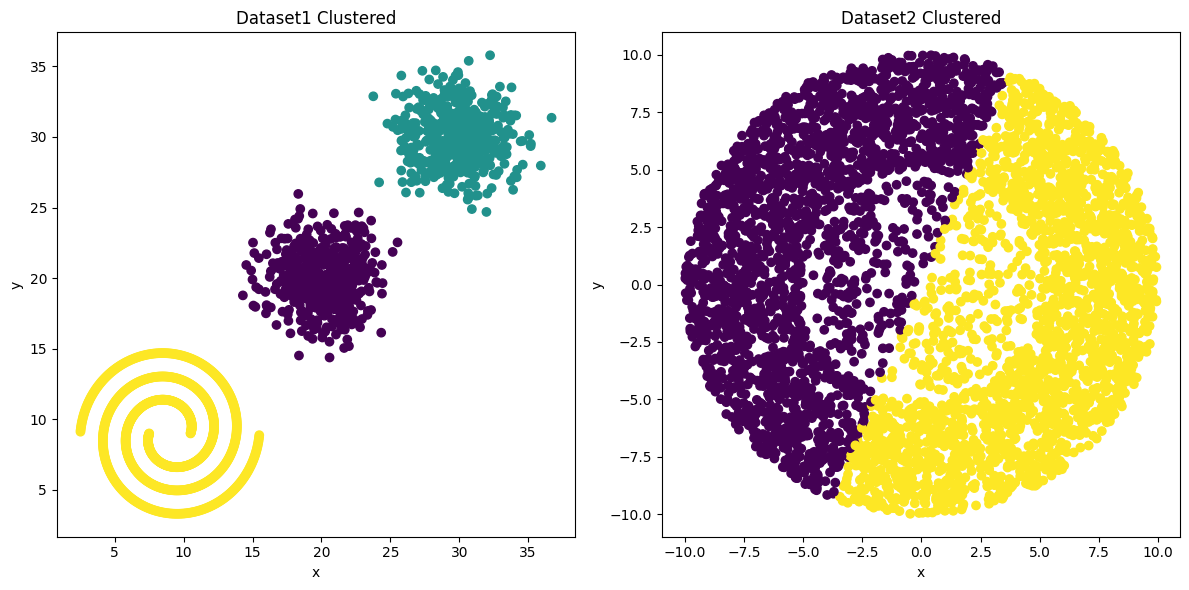

Cluster centers for Dataset1:
 [[20.09935944 19.94999309]
 [29.89850662 30.02981985]
 [ 9.          9.        ]]
Cluster centers for Dataset2:
 [[-4.42351958  1.77627049]
 [ 4.35783133 -1.78980042]]


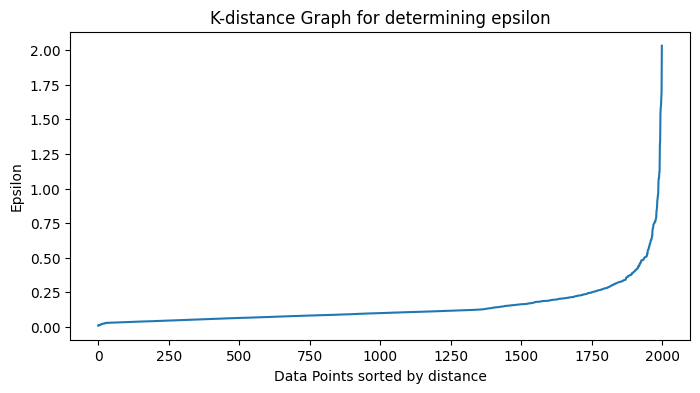

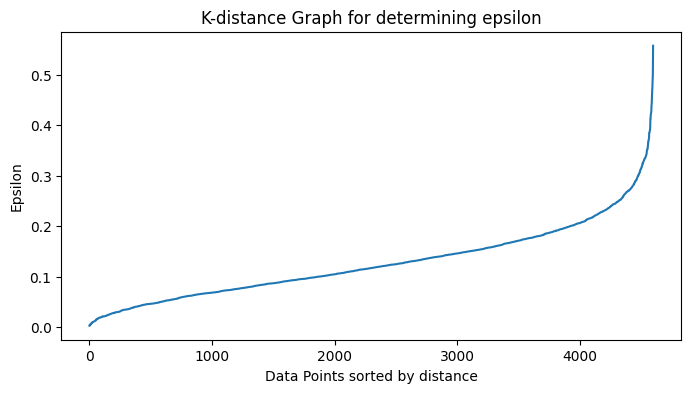

Silhouette Score for Dataset1 with DBSCAN: -0.03016597073502742
Silhouette Score for Dataset2 with DBSCAN: -0.06459496093246013


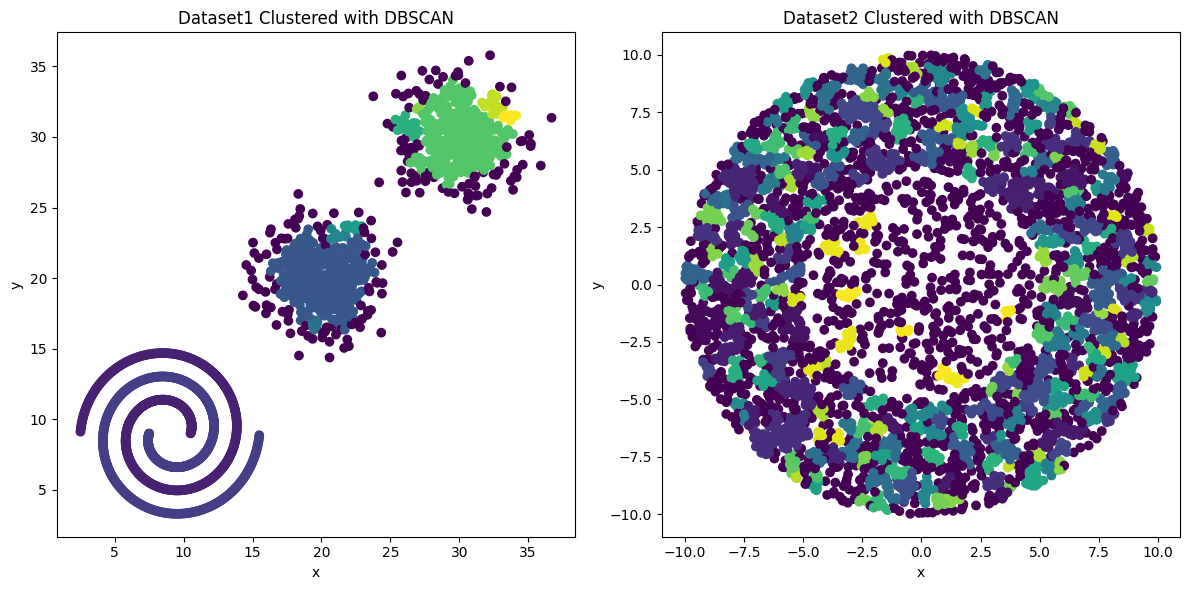


Comparison of Silhouette Scores:
KMeans Silhouette Score for Dataset1: 0.6958375349228363
DBSCAN Silhouette Score for Dataset1: -0.03016597073502742
KMeans Silhouette Score for Dataset2: 0.3769508590260366
DBSCAN Silhouette Score for Dataset2: -0.06459496093246013


In [9]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors

dataset1 = pd.read_csv('./Datasets/Dataset1.txt', delimiter=',')
dataset2 = pd.read_csv('./Datasets/Dataset2.txt', delimiter=',')
# Prepare data
data1 = dataset1[['x', 'y']]
data2 = dataset2[['x', 'y']]

def plot_elbow_method(data, max_k=10):
    distortions = []
    silhouette_scores = []
    K = range(2, max_k+1)
    
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)
        
    plt.figure(figsize=(16, 8))
    
    plt.subplot(1, 2, 1)
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    
    plt.subplot(1, 2, 2)
    plt.plot(K, silhouette_scores, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Method showing the optimal k')
    
    plt.show()

plot_elbow_method(data1, max_k=10)

plot_elbow_method(data2, max_k=10)

kmeans1 = KMeans(n_clusters=3, random_state=42).fit(data1)  # For Dataset1
kmeans2 = KMeans(n_clusters=2, random_state=42).fit(data2)  # For Dataset2

silhouette_score1 = silhouette_score(data1, kmeans1.labels_)
silhouette_score2 = silhouette_score(data2, kmeans2.labels_)

print(f"Silhouette Score for Dataset1 with 3 clusters: {silhouette_score1}")
print(f"Silhouette Score for Dataset2 with 2 clusters: {silhouette_score2}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data1['x'], data1['y'], c=kmeans1.labels_, cmap='viridis')
plt.title('Dataset1 Clustered')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.scatter(data2['x'], data2['y'], c=kmeans2.labels_, cmap='viridis')
plt.title('Dataset2 Clustered')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

print("Cluster centers for Dataset1:\n", kmeans1.cluster_centers_)
print("Cluster centers for Dataset2:\n", kmeans2.cluster_centers_)

def optimal_eps(data):
    neighbors = NearestNeighbors(n_neighbors=5)
    neighbors_fit = neighbors.fit(data)
    distances, indices = neighbors_fit.kneighbors(data)
    distances = np.sort(distances, axis=0)
    distances = distances[:, 1]
    plt.figure(figsize=(8, 4))
    plt.plot(distances)
    plt.xlabel('Data Points sorted by distance')
    plt.ylabel('Epsilon')
    plt.title('K-distance Graph for determining epsilon')
    plt.show()

optimal_eps(data1)

optimal_eps(data2)

dbscan1 = DBSCAN(eps=0.5, min_samples=5).fit(data1)  
dbscan2 = DBSCAN(eps=0.25, min_samples=5).fit(data2)  

if len(set(dbscan1.labels_)) <= 1:
    dbscan1 = DBSCAN(eps=2.0, min_samples=5).fit(data1)
if len(set(dbscan2.labels_)) <= 1:
    dbscan2 = DBSCAN(eps=2.0, min_samples=5).fit(data2)

if len(set(dbscan1.labels_)) > 1:
    silhouette_score_dbscan1 = silhouette_score(data1, dbscan1.labels_)
else:
    silhouette_score_dbscan1 = "Not applicable (only one cluster found)"

if len(set(dbscan2.labels_)) > 1:
    silhouette_score_dbscan2 = silhouette_score(data2, dbscan2.labels_)
else:
    silhouette_score_dbscan2 = "Not applicable (only one cluster found)"

print(f"Silhouette Score for Dataset1 with DBSCAN: {silhouette_score_dbscan1}")
print(f"Silhouette Score for Dataset2 with DBSCAN: {silhouette_score_dbscan2}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data1['x'], data1['y'], c=dbscan1.labels_, cmap='viridis')
plt.title('Dataset1 Clustered with DBSCAN')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.scatter(data2['x'], data2['y'], c=dbscan2.labels_, cmap='viridis')
plt.title('Dataset2 Clustered with DBSCAN')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

print("\nComparison of Silhouette Scores:")
print(f"KMeans Silhouette Score for Dataset1: {silhouette_score1}")
print(f"DBSCAN Silhouette Score for Dataset1: {silhouette_score_dbscan1}")
print(f"KMeans Silhouette Score for Dataset2: {silhouette_score2}")
print(f"DBSCAN Silhouette Score for Dataset2: {silhouette_score_dbscan2}")